# Project 4 - Wrangle and Analyze Data (1st revision)

**Nanodegree: Data Analyst** <br>
**Student: D.A. Plager** <br>
**Date: 2021_06_05** <br>

I.   [Project Goal](#Goal)<br>
II.  [Gather](#Gather)<br>
III. [Assess](#Assess)<br>
IV. [Clean](#Clean)<br>
V.  [Store Wrangled Data](#Store)<br>
VI. [Analyze and Visualize](#Analyze)<br>

<a id='Goal'></a>
### I. Project Goal
> **Wrangle `@WeRateDogs` Twitter data to create interesting and trustworthy analyses and visualizations.**<br>

In [1]:
# Import the needed libraries.
import pandas as pd
import numpy as np
import requests
import tweepy    # If "ModuleNotFoundError":  Need to use conda or pip to install the library/package 
import json      # into the conda/Anaconda environment; see my "Anaconda3(DAP)2020_09_12.docx" notes.
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

<a id='Gather'></a>
## II. Gather

### 1.  Enhanced Twitter Archive

In [2]:
# Load the "on-hand" comma-separated flat file data from 'twitter-archive-enhanced.csv' into a Pandas DataFrame.
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.shape

(2356, 17)

In [3]:
# Initial viewing of the 'twitter-archive-enhanced.csv' (df_1) contents.
print(df_1.info())
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Breed Prediction File

In [4]:
# Load the Udacity server's internet-accessible, tab-separated flat file 'image-predictions.tsv' into a Pandas DataFrame.

# URL for the file of interest.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# "Request" the desired internet-accessible file content. 
response = requests.get(url)

# After looking back at my "DataWrangling2021_04_02.docx, Lesson 1, Section 12" notes.
print(response)                  # REM: Response = 200 means "successful", and
                                 # REM: 'response' content currently in temporary working memory.
    
print(response.encoding)         # Check the encoding scheme of the requested file content.

print(response.content[0:100])   # String slicing worked to show just the start of the "bytes formatted" ("b" prefixed) file.
                             # Otherwise, see https://stackoverflow.com/questions/1767513/how-to-read-first-n-lines-of-a-file.

# Pull out the filename (last token) from the starting 'url'.
print(url.split('/')[-1])
        
# Write the 'bytes format' (BYTE string) .content to a binary file; rather than writing a CHARACTER string to a file,
# which would use mode='w' and apparently automatically encodes the CHARACTER string in a knowably retrievable form when
# read using mode='r'.  SEE https://stackoverflow.com/questions/2665866/what-does-wb-mean-in-this-code-using-python!
with open(url.split('/')[-1], mode='wb') as bytes_file:
    bytes_file.write(response.content)

<Response [200]>
utf-8
b'tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\tht'
image-predictions.tsv


In [5]:
# Check that the bytes formatted file ('image-predictions.tsv') was written/saved.
# NOTE: By clicking on the upper-left "jupyter" icon above, one can see that a file titled
# 'image-predictions.tsv' is now present.  Alternatively,...
os.listdir()

['twitter-archive-enhanced.csv',
 'breed_predictions.csv',
 'twitter_archive_master.csv',
 'retweet_fav_counts.csv',
 'tweet_json.txt',
 'wrangle_report.pdf',
 'wrangle_act_v1.ipynb',
 'act_report.pdf',
 'image-predictions.tsv',
 '.ipynb_checkpoints',
 'tweet_json2.txt',
 'wrangle_act.ipynb',
 'dog_stages.csv']

In [6]:
# Check the 'image-predictions.tsv' files content.
# NOTE:  Should be able to "Open with" in a text editor (e.g., Brackets) and it should be readable.  YES, it looked correct.
# Alternatively,...
with open('image-predictions.tsv', mode='rb') as bytes_file:    # NOTE: binary mode does not take an  encoding=  parameter.
    for i in range(5):
        print(bytes_file.readline())

b'tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n'
b'666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n'
b'666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n'
b'666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n'
b'666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n'


In [7]:
# "Directly" load written 'image-predictions.tsv' file into a Pandas DataFrame.
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')
df_2.shape

(2075, 12)

In [8]:
# Initial viewing of the 'image-predictions.tsv' (df_2) contents.
# NOTE: Should also be able to open this .tsv file via Excel.  YES, it was openable via Excel.
print(df_2.info())
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Retweet and Favorite Counts

In [9]:
# NOTE TO REVIEWER:  I had problems with Twitter developer verification, so I only reviewed the following Twitter API code
# provided by Udacity with respect to gathering additional data via Twitter's API.  I have also added
# additional comments to indicate my understanding of the most relevant lines of this code (DAPlager).

# import tweepy                     # Imported 'tweepy' above (DAP).
from tweepy import OAuthHandler
# import json                       # Imported 'json' above (DAP).
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file [I PROCEEDED BY USING
# THE PROVIDED "tweet_json.txt" FILE; See next Code Cell (DAP)].

# These are hidden to comply with Twitter's API terms and conditions.
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame containing the twitter_archive_enhanced.csv data, including a 'tweet_id' column. 
tweet_ids = df_1.tweet_id.values
tweet_ids = tweet_ids[0:10]       # Added to reduce the number of tweet_ids to less than the full 2356 (DAP).

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive.
count = 0
fails_dict = {}    # Dictionary to collect information for failed requests for tweet content via Twitter API (DAP).  
start = timer()    # Starting time mark preceding the below code execution (DAP).

# Save each tweet's returned JSON as a new line in a .txt file.
with open('tweet_json2.txt', 'w') as outfile:   # CHANGED FILENAME TO AVOID OVERWRITING UDACITY-PROVIDED tweet_json.txt (DAP).
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit (if it were fully functional (DAP)).
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:                                                           # 'try'ing a typical .get() "request" via tweet id (DAP).
            tweet = api.get_status(tweet_id, tweet_mode='extended')    # NOTE: This is the POINT OF FAILURE; presumably
            print("Success")                                           # because of nonfunctional access codes (DAP).
            
            json.dump(tweet._json, outfile)    # ._json attribute/field containing each tweet's JSON-formatted content and 
                                               # json.dump() to write the JSON string to the designated .txt "outfile" (DAP).
            outfile.write('\n')                # To separate each tweet's JSON content with a newline character (\n) (DAP).
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e           # TweepError (e) "value" assigned to its corresponding tweet_id "key"
            pass                               # within the 'fail_dict' dictionary (DAP).
        
end = timer()                                  # Ending time mark.
print('Timer:', end - start)
print('Fails Dictionary:', fails_dict)

# NOTE: The Udacity-provided 'tweet_json.txt' opened in a text editor showed 2354 successfully written tweets
# of the starting 2356 tweet_id's (DAP).

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
Timer: 1.717738982999947
Fails Dictionary: {892420643555336193: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 892177421306343426: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891815181378084864: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891689557279858688: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891327558926688256: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 891087950875897856: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 890971913173991426: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],), 890729181411237888: TweepError([{'code': 89, 'message': 'Inval

In [10]:
# Read 'tweet_json.txt' line-by-line (each line being a single tweet record) to generate a list of dictionaries 
# containing tweet_id, retweet_count, and favorite_count.
retweet_fav_list = []

# See https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/ .
with open('tweet_json.txt', mode='r') as json_file:

# Checked Udacity's FAQ link for Project 4:  https://sites.google.com/udacity.com/dataanalyst-project4/home .
# From Udacity FAQ at https://knowledge.udacity.com/questions/280182 "Next step after reading twitter id".  
# Also see very good, brief overview https://www.programiz.com/python-programming/json (in my "DataWrangling2021_04_02.docx")!!

# Loop through each line (i.e., each tweet) of the 'open' "tweet_json.txt" file and 'key' index the desired 
# retweet_count and favorite_count values:
    for line in json_file:    # REM: "Sequentially" returns each entire line of a text file, which are JSON strings
                              # (i.e. each 'line' is an individual tweet).
        try:
            data_dict = json.loads(line)    # "Load" JSON string as a Python dictionary.
            # NOTE:  "AttributeError: 'str' object has no attribute 'read'"  if just json.load(line)  [not "loads"]!
                
            # Looking at 'tweet_json.txt' file in a text editor, the relevant JSON object (i.e., data_dict dictionary)  
            # keys should be 'id' [for tweet_id as an int; OR if a string, cast to int w/ int(tweet_data['id'])], 
            # 'retweet_count', and 'favorite_count'.
            retweet_fav_dict = {"tweet_id": data_dict['id'],
                               "retweet_count": data_dict['retweet_count'],
                               "favorite_count": data_dict['favorite_count']}
            retweet_fav_list.append(retweet_fav_dict)    # Building a list of dictionaries for subsequent DataFrame generation.
        
#            print(retweet_fav_list)    # Just to check.
#            break

# This try-except block ended up not being necessary in this case.
        except KeyError as key_e:    # Not completely sure which error type to expect.
            print(key_e)
        
        except Exception as e:
            print(e)

# The 'tweet_json.txt' file opened in a text editor showed 2354 records (i.e., tweets) and checking
# that the final 'retweet_fav_list' element information is for the last, 2354th tweet.
print(len(retweet_fav_list))
retweet_fav_list[-1]
# NOTE: Looks good.

2354


{'tweet_id': 666020888022790149, 'retweet_count': 532, 'favorite_count': 2535}

In [11]:
# Create a Pandas DataFrame from the generated list of dictionaries ('retweet_fav_list'). 
df_3 = pd.DataFrame(retweet_fav_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
print(df_3.info())
df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB
None


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
# Save this retweet count and favorite count data to a .csv file for later visual assessment in Excel spreadsheet.
df_3.to_csv('retweet_fav_counts.csv', index=False)

<a id='Assess'></a>
## III. Assess

#### Typical Visual and Programmatic Assessments
- Data Quality (Missing, Invalid, Inaccurate, Inconsistent)
- Data Tidiness (Columns, Rows, and Tables)

### 1. Visual Assessment (partly via Excel spreadsheet) 

- [See "Visual Assessment Issues" below](#VAI)

### 2. Programmatic Assessment
- ["Programmatic Assessment Issues" listed further below](#PAI)

#### A. *Missing Data (Quality) and Structural (Tidiness) Issues with respect to all three DataFrames (df_1, df_2, and df_3)*

In [13]:
# Assessment of 'twitter-archive-enhanced.csv' (df_1) data for NaNs/Nulls, Total row count, and column data types.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- **NOTE: Rather than always including a "Conclusion" section after each Code Cell, I have gathered my programmatic data quality and tidiness assessments in the "Programmatic Assessment Issues" section below.**

In [14]:
# Assessment of 'image-predictions.tsv' (df_2) data for NaNs/Nulls, Total row count, and column data types.
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# Assessment of 'retweet_fav_counts.csv' (df_3) data for NaNs/Nulls, Total row count, and column data types.
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
# Check if any 'tweet_id's are repeated in df_1 (should not have any repeats, so .nunique() should return 2356).
df_1.tweet_id.nunique()

2356

In [17]:
# Check if any tweet_id's are associated with more than one image, i.e. "duplicated" (if not, then could combine 
# 'jpg_url' and 'img_num' with df_1 via 'tweet_id' to avoid redundancy other than 'tweet_id'
# after "melting" the prediction 1, 2, and 3-associated columns).
df_2.tweet_id.nunique()

# NOTE: So itc, 1 tweet-to-1 image-to-MANY predictions. HOWEVER, IF it were 1 tweet-to-MANY images-to-MANY predictions, 
# then it typically would be better to have an intervening 'tweet_imgs' Table.

2075

In [18]:
# Check if all 2075 'tweet_id's in df_2 are in the 2356 'tweet_id's of df_1.
set_1 = set(df_1.tweet_id.values)
set_2 = set(df_2.tweet_id.values)
len(set_1.intersection(set_2))

# YES, all 2075 tweet_id's in df_2 are in df_1

2075

In [19]:
# Check if any tweet_id's are repeated in df_3 (should not have any repeats, so .nunique() should return 2354).
df_3.tweet_id.nunique()

# NOTE: Thus, should be able to nicely join/merge 'retweet_count' and 'favorite_count' columns to df_1 based on 'tweet_id'. 

2354

In [20]:
# Check which 'tweet_id's in df_1 are NOT in df_3. 
set_3 = set(df_3.tweet_id.values)
diff_set = set_1.difference(set_3)
diff_set

# NOTE: As expected from the number of unique values in df_1 and df_3, only a difference of two tweet_id's.

{771004394259247104, 888202515573088257}

In [21]:
# View the two tweets in df_1 that are NOT in df_3.
df_1.query('tweet_id in @diff_set')

# NOTE: Both of these are retweets, which will be dropped.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieornah/status/77100213...,12,10,None,None,None,pupper,None


In [22]:
# Check the 78 "in_reply_to_..." non-null rows.
print(df_1[df_1.in_reply_to_status_id.notnull()].shape)
df_1[df_1.in_reply_to_status_id.notnull()]

# NOTE: MY UNDERSTANDING is that these "replies" would NOT be considered to be "original ratings"
#       and, therefore, should eventually be dropped. 
# NOTE: The majority of these 78 rows appear to have NaN/Null for the 'expanded_urls' column (59 values of which were NaN).

(78, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [23]:
# Check the 181 "retweeted_..." non-null rows. 
print(df_1[df_1.retweeted_status_id.notnull()].shape)
df_1[df_1.retweeted_status_id.notnull()]

# NOTE: MY UNDERSTANDING is that these "retweets" would NOT be considered to be "original ratings"
#       and, therefore, should eventually be dropped. 

(181, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


#### B. _Other Data Quality Issues (invalid, inaccurate, or inconsistent data)_

#### 1. Enhanced Twitter Archive (df_1)

**a. Numeric columns:**

In [24]:
# Check numeric columns in df_1 for expected values.
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Conclusions:
- `tweet_id` values are within the expected range.
- The values in the two `..._status_id` columns appear to be within the expected range.
- The values in the two `..._user_id` columns have a much wider, perhaps unexpected, range?
- `rating_numerator` includes unexpectedly low (0) and unexpectedly high (1776) values.
- `rating_denominator` includes unexpectedly low (0) and unexpectedly high (170) values (in general, should be 10).

In [25]:
# Check the range of rating numerator values.
df_1.rating_numerator.value_counts()

# NOTE: Perhaps many of the odd values are associated with non-original tweets that will be dropped?  
#       Recheck after dropping replies and retweets.

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
# Check for possible break in valid ratings beyond rating_numerator == 14; check the rows with a value of 15 or 17.
df_1.query('rating_numerator > 14 & rating_numerator < 18')    # Should be three rows.

# NOTE: These rows are for "reply" and "retweet" tweets that will be dropped.  Furthermore, the
#       low value counts above a value of 14 suggest that such values are unlikely to be accurate.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None


In [27]:
# Check the range of rating denominator values.
df_1.rating_denominator.value_counts()

# NOTE: Perhaps many of the non-10 values are associated with non-original tweets that will be dropped?
#       Recheck after dropping replies and retweets.

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
# Check the three rating_denominator == 11 rows (just as one possible check).
df_1.query('rating_denominator == 11')

# NOTE: The first of these is a retweet that will be dropped.
#       The second (740373189193256964) has errors: 'name' should be Bretagne and rating should be 14/10.
#       The third (682962037429899265) has an error: rating should be 10/10. ('name' is Darrel)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


**b. Non-Numeric Columns:**

In [29]:
# Check non-numeric columns for expected values.

# Check the 'name' column values.
df_1.name.value_counts()

# NOTE: Lots of "None"s and several non-name values (e.g., "a" and "an").

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Buddy         7
Bailey        7
Daisy         7
an            7
Toby          7
Scout         6
Rusty         6
Leo           6
Jax           6
Stanley       6
Oscar         6
Jack          6
Milo          6
Dave          6
Bella         6
Koda          6
Alfie         5
           ... 
Bauer         1
Mac           1
Bubba         1
Ruffles       1
Barney        1
Geoff         1
Cecil         1
Fabio         1
Philippe      1
Saydee        1
Brat          1
Oreo          1
Mabel         1
Rudy          1
Andy          1
Miley         1
Emma          1
Tango         1
Nico          1
Kellogg       1
Ozzie         1
Margo         1
Ace           1
Zooey         1
Karl          1
Marq          1
Mack          1
Danny         1
Shelby        1
Craig         1
Name: name, Length: 957,

In [30]:
# Check the dog "stage" columns for expected values.
print(df_1.pupper.value_counts(), "\n")

print(df_1.puppo.value_counts(), "\n")

print(df_1.doggo.value_counts(), "\n")

print(df_1.floofer.value_counts())

# NOTE: All look as expected, although mostly "None".

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64 

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64


#### 2. Breed Prediction File (df_2)

**a. Numeric columns:**

In [31]:
# Check numeric columns in df_2 for expected values.
df_2.describe()

# NOTE: All look as expected.

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**b. Non-Numeric Columns:**

In [32]:
# Check whether all jpg_url values conform to a general regular expression form ( https://pbs.twimg.com/....jpg ).
# NOTE:  ~(...) for NOT that within the parentheses;  ^ for start of the entire string;  . for any character; 
# + for 1 or more of the preceding;  \ for "escape" for the literal following character, itc . ;  $ for end of the 
# entire string.
df_2[~(df_2.jpg_url.str.match('^https://pbs.twimg.com/.+\.jpg$'))]

# NOTE: Two images' jpg_url values apparently do not conform to the expected  "https://pbs.twimg.com/....jpg" .

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


In [33]:
# Try to see the entire 'jpg_url' values for the preceding.
non_jpg_indexes = df_2[~(df_2.jpg_url.str.match('^https://pbs.twimg.com/.+\.jpg$'))].index
print(non_jpg_indexes)

df_2.loc[non_jpg_indexes, 'jpg_url']

# NOTE:  Still truncated. LOOKED VIA EXCEL INSTEAD, 320 and 815 include a .png file rather than a .jpg file!

Int64Index([320, 815], dtype='int64')


320    https://pbs.twimg.com/tweet_video_thumb/CVKtH-...
815    https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...
Name: jpg_url, dtype: object

In [34]:
# Check the values within one of the three dog breed prediction columns.
df_2.p1.value_counts()

# NOTE: Many non-dog breed predictions.

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [35]:
# Check for only the expected True or False (boolean) values in p1_dog, p2_dog, and p3_dog.
print(df_2.p1_dog.value_counts(), "\n")

print(df_2.p2_dog.value_counts(), "\n")

print(df_2.p3_dog.value_counts())

# NOTE:  All appear as expected.

True     1532
False     543
Name: p1_dog, dtype: int64 

True     1553
False     522
Name: p2_dog, dtype: int64 

True     1499
False     576
Name: p3_dog, dtype: int64


#### 3. Retweet and Favorite Counts (df_3)

**a. Numeric columns:**

In [36]:
# Check numeric columns in df_2 for expected values.
df_3.describe()

# NOTE: All look as expected.

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


**b. Non-Numeric Columns:**

> Not Applicable.

<a id='VAI'></a>
### Visual Assessment Issues

**NOTE:** <br>
df_1 has 2356 rows.<br>
df_2 has 2075 rows.<br>
df_3 has 2354 rows.<br><br>

**twitter-archive-enhanced.csv (df_1):**<br>
Data Quality issues<br>
- v1. Multiple "None" values in the inappropriately arranged individual dog "stage" columns.
- v2. Some "None" in the `name` column.
- v3. Numerator of 5 for Bella, tweet_id = 883482846933004288, Row 47.  (actual rating = 13.5/10)
- v4. Still some apparent retweets.  "RT..." in multiple rows, including Rows 21, ..., 70, 75 (RT of Row 77, apparently), 76, and 80.
- v5. Several rows with 'in_reply_to_status_id' and 'in_reply_to_user_id' values; otherwise, NaNs.
- v6. Numerators >100 in at least Rows 292 and 315.
- v7. Numerator and Denominator of 84 and 70, respectively, in Row 435.
- v8. Odd name, at least Rows 917, 1174, and 1561.  (Row 917, tweet_id = 757354760399941633, special character formatting that looks odd in Excel but fine in Pandas DataFrame; Devon w/ an accented o .)
- v9. Odd text, ðŸ‘ðŸ» in at least Rows 1226 and 1261.  (These appear to be associated with special character formatting or a small image, which show up fine in a Pandas DataFrame but not in Excel) 
- v10. Invalid/Inaccurate name of "a" or "an" in at least Rows 1353, 1363, 1364, and 1370.

Data Tidiness issues<br>
- v11. Individual dog "stage" values (pupper, puppo, doggo, floofer) inappropriately arranged as column header variables.<br><br>

**image-predictions.tsv (df_2):**<br>
Data Quality issues<br>
- v12. 281 rows fewer than that in "twitter-archive-enhanced.csv" (df_1).

Data Tidiness issues<br>
- v13. The df_2 columns appear as though they can be merged with df_1 based on tweet_id. ~~(The three "p1...", three "p2...", and three "p3..." columns are inappropriately arranged.)~~<br><br>

**retweet_fav_counts.csv (df_3):**<br>
Data Quality issues<br>
- v14. Two rows fewer than that in "twitter-archive-enhanced.csv" (df_1).

Data Tidiness issues<br>
- v15. ~~(`tweet_id` redundant with respect to a)~~ The 1-to-1 relationship between these "retweet_fav_counts" (df_3) data rows and the "twitter-archive-enhanced" (df_1) data rows should allow the df_3 columns to be merged with df_1 based on tweet_id.

<a id='PAI'></a>
### Programmatic Assessment Issues

**twitter-archive-enhanced.csv (df_1):**<br>
Data Quality issues<br>
- p1. The two `in_reply...` columns only have 78 non-nulls.
- p2. The three `retweeted...` columns include 181 non-nulls.
- p3. `expanded_urls` column is missing 59 values. (Many of these missing values are among the 78 non-null "reply" rows; see above.)
- p4. Note that the "None" string values in the four dog stage (pupper, puppo, doggo, floofer) columns were NOT recognized as NaNs/Nulls.
- p5. `timestamp` column is object rather than datetime data type.
- p6. `rating_numerator` includes unexpectedly low (0) and unexpectedly high (1776) values (values above 14 appear to be erroneous)
- p7. `rating_denominator` includes unexpectedly low (0) and unexpectedly high (170) values (in general, should be 10).
- p8. "None" and other non-name values in `name` column.
- p9. Again, many "None" values in `pupper` and other dog stage columns.
- p18. tweet_id == 740373189193256964 (index 794) has errors: 'name' should be Bretagne and rating should be 14/10.
- p19. tweet_id == 682962037429899265 (index 1313) has an error: rating should be 10/10. ('name' is Darrel)

Data Tidiness issues<br>
- p10. Again, individual dog stage values (pupper, puppo, doggo, floofer) inappropriately arranged as column header variables.<br><br>

**image-predictions.tsv (df_2):**<br>
Data Quality issues<br>
- p11. Again, 281 rows fewer than that in "twitter-archive-enhanced.csv" (df_1).
- p12. Two of the `jpg_url` values are URLs to .png files, rather than to .jpg files.
- p13. Many non-dog breed predictions.

Data Tidiness issues<br>
- ~~(p14. Again, the three "p1...", three "p2...", and three "p3..." columns are inappropriately arranged.)~~ <br><br>
- p15. Only one image per tweet_id is used to generate three predictions (i.e., 1 tweet-to-1 image). Therefore, could join df_2 columns with df_1 based on 'tweet_id'. ~~(to avoid redundancy other than 'tweet_id' in df_2 after "melting" the df_2 prediction 1-, 2-, and 3-associated columns. HOWEVER, IF one had 1 tweet-to-Many images-to-Many predictions, it would likely be better to have a third intervening 'tweet_images' Table between the main "tweets" table (df_1) and the "predictions" table (df_3).)~~<br><br>

**retweet_fav_counts.csv (df_3):**<br>
Data Quality issues<br>
- p16. Again, two rows fewer than that in "twitter-archive-enhanced.csv" (df_1).

Data Tidiness issues<br>
- p17. Again, ~~(`tweet_id` redundant with respect to a)~~ The 1-to-1 relationship between these "retweet_fav_counts" data rows and the "twitter-archive-enhanced" data rows should allow the df_3 columns to be merged with df_1 based on tweet_id. <br>

<a id='Clean'></a>
## IV. Clean

In [37]:
# Make a "CLEAN" COPY of the original DataFrame(s).
df1_clean = df_1.copy()
df2_clean = df_2.copy()
df3_clean = df_3.copy()

#### Typical Cleaning Order
1. Missing data
2. Structural (Data Tidiness) issues
3. Other Data Quality issues

### A. *Cleaning Missing Data and Structural Issues involving all three DataFrames (df_1, df_2, and df_3)*

**With respect to addressing "MISSING DATA" first:**<br>
- **One form of missing data in df_1 might include the NaNs of the two "reply" and three "retweet" columns.  Regarding this, my understanding of Udacity's "Key Point" stating that "You only want original ratings (no retweets) that have images" is that the rows of df_1 associated with a reply or a retweet should be dropped.  Looking further at the df_1 data suggested that dropping the reply and retweet _rows_ will likely eliminate the need for the related two "reply" and three "retweet" _columns_ of df_1.**<br><br>
- **A second form of "Missing Data" might include the "None" values associated with the inappropriate arrangement of the dog "stages" (pupper, puppo, doggo, floofer).  This inappropriate data arrangement also represents a DATA STRUCTURE/TIDINESS ISSUE.**<br><br>
- **A third form of "Missing Data" might include the "None" values of the `name` column.**

### Issue v1, p1, and p2: "Non-original ratings" associated with the two "in_reply..." columns having 78 non-null rows and the three "retweeted..."columns having 181 non-null rows in df_1.
#### Define
Drop the non-null "in_reply" and "retweeted" rows from df1_clean, re-evaluate the "in_reply" and "retweeted" columns (.info()) for any remaining non-nulls, and if, as expected, there are none, drop the five "in_reply" and "retweeted" columns.

#### Code and Test

In [38]:
# Identify the "in_reply" and "retweeted" rows to be dropped.
reply_retweet_rows = df1_clean[df1_clean.in_reply_to_status_id.notnull() | df1_clean.retweeted_status_id.notnull()]
reply_retweet_rows.shape

# NOTE: Shape should be (259, 17), i.e., 78 + 181 = 259 rows.

(259, 17)

In [39]:
# Temporarily drop the "in_reply" and "retweeted" rows from df1_clean.
df1_clean.drop(reply_retweet_rows.index, axis=0, inplace=False).shape

# NOTE: 2356 - 259 = 2097 rows remaining.

(2097, 17)

In [40]:
# Permanently drop the "in_reply" and "retweeted" rows from df1_clean and re-evaluate the df1_clean DataFrame.
df1_clean.drop(reply_retweet_rows.index, axis=0, inplace=True)
df1_clean.info()

# NOTE: Looks good, although still 3 missing 'expanded_urls' at this point.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [41]:
# Drop the five "in_reply" and "retweeted" columns from df1_clean.
df1_columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                       'retweeted_status_user_id', 'retweeted_status_timestamp']
df1_clean.drop(df1_columns_to_drop, axis=1, inplace=True)
df1_clean.info()

# NOTE: Looks good, other than the three missing 'expanded_urls'.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### CONCLUSIONS:
- DataFrame df1_clean no longer contains "non-original" ratings.<br><br>
- The "missing data" (NaNs) of the two `in_reply...` and the three `retweeted...` columns have been removed. 

## REQUIRED CHANGE

### Issue v11 and p10 : Individual dog "stage" values (pupper, puppo, doggo, floofer) inappropriately arranged as column header variables in df_1.
#### Define
Check df1_clean for rows that include more than one non-"None" dog stage designation and, if necessary, combine the multiple stages into a single string. Then, combine the four dog stages into a single `dog_stage` column within df1_clean.<br>

~~(Check df1_clean for rows that include more than one non-"None" dog stage designation (if "1" tweet involves "Many" dog stage designations, it would be more appropriate to generate an additional Table).  If only a single dog stage designation per row, then .melt() the four dog stages into values within a `dog_stage` column within df1_clean. If more than a single dog stage designation per row then make a separate Table/DataFrame with `tweet_id` column and the four dog stages melted into one `dog_stage` column.  Next, drop rows with .duplicated() tweet_id's AND(&) dog_stage == "None" (REM: Only the second or more "duplicated" row(s) are marked as True, unless `keep=False` parameter is passed). This should allow retention of the rows with identical tweet_id's, but more than one dog stage designation.)~~<br><br>

NOTE: The four dog stage columns (pupper, puppo, doggo, and floofer) are dropped from df1_clean further below.

#### Code and Test

In [42]:
# Check for rows in df1_clean that include more than one non-"None" dog stage designation.
df1_clean.groupby(['doggo', 'floofer', 'pupper', 'puppo']).count()

# NOTE: It looks like there are 11 doggo rows that also have one of the other three dog stages;
#       I was expecting many more rows having 'floofer' in combination with one of the other three dog stages.

tweet_id  timestamp  source  text  expanded_urls  \
doggo floofer pupper puppo                                                     
None  None    None   None       1761       1761    1761  1761           1759   
                     puppo        23         23      23    23             23   
              pupper None        221        221     221   221            220   
      floofer None   None          9          9       9     9              9   
doggo None    None   None         72         72      72    72             72   
                     puppo         1          1       1     1              1   
              pupper None          9          9       9     9              9   
      floofer None   None          1          1       1     1              1   

                            rating_numerator  rating_denominator  name  
doggo floofer pupper puppo                                              
None  None    None   None               1761                1761  1761  
                     puppo                23                  23    23  
              pupper None                221                 221   221  
      floofer None   None                  9                   9     9  
doggo None    None   None                 72                  72    72  
                     puppo                 1                   1     1  
              pupper None                  9                   9     9  
      floofer None   None                  1                   1     1

In [43]:
# Confirm that there are 9 rows with both a "doggo" AND a "pupper" stage designation.
df1_clean.query('doggo == "doggo" & pupper == "pupper"')

# NOTE: Yes, there are 9 rows with both "doggo" and "pupper", and in some instances, more than one dog name 
#       is also listed within the 'text' field.

# NOTE: The one row (index 956) with a rating_numerator < 10 apparently involves an image that does NOT contain a dog.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
1113,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None


In [44]:
# A list of both the column names AND the row values of interest for use below.
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo']   

In [45]:
# A more general approach to identify rows with 2 or more values within a list of
# specified column values such as dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo'].
# NOTE: In this case, the elements of dog_stage_list correspond to both the column names 
# AND the row values of interest.
df1_clean[df1_clean[dog_stage_list].isin(dog_stage_list).sum(axis=1) > 1]

# REM: This  .isin()  method behaves like  .isnull()  and  .notnull()  by returning boolean True or False
# for each value among the designated DataFrame or DataFrame portion.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [46]:
# REQUIRED CHANGE: Replace all 'None's in the four dog stage columns with empty string to allow subsequent 
# multiple-stage string concatenation.
# df1_clean[dog_stage_list].replace('None', '', inplace=True)    # WARNING and did NOT work as currently written.
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

df1_clean[df1_clean[dog_stage_list].isin(dog_stage_list).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,,,puppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,,
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,,pupper,
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,,pupper,
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,,pupper,
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,,pupper,
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,,pupper,


In [47]:
# REQUIRED CHANGE: Concatenate the four dog stage column strings into a new 'dog_stage' column value.
df1_clean['dog_stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

df1_clean[df1_clean[dog_stage_list].isin(dog_stage_list).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,,,puppo,doggopuppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,,,doggofloofer
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,,doggopupper
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,,pupper,,doggopupper
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,,doggopupper
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,,pupper,,doggopupper
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,,pupper,,doggopupper
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,,doggopupper
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,,pupper,,doggopupper
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,,pupper,,doggopupper


In [48]:
# REQUIRED CHANGE: Reformat the multiple-stage concatentations into a string with two comma separated stages.
# REM: .loc single cell selection with [Boolean logic selection of Row , column designation] and value re-assignment. 
df1_clean.loc[df1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper' 
df1_clean.loc[df1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo' 
df1_clean.loc[df1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

df1_clean[df1_clean[dog_stage_list].isin(dog_stage_list).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,,,puppo,"doggo,puppo"
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,,,"doggo,floofer"
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,,"doggo,pupper"
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,,pupper,,"doggo,pupper"
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,,"doggo,pupper"
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,,pupper,,"doggo,pupper"
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,,pupper,,"doggo,pupper"
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,,"doggo,pupper"
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,,pupper,,"doggo,pupper"
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,,pupper,,"doggo,pupper"


In [49]:
# Replace empty strings in dog_stage column with more meaningful 'None's (i.e., someone looked, but no dog stage(s) identified).
df1_clean.dog_stage.replace('', 'None', inplace=True)
df1_clean[140:160]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
168,859607811541651456,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,,,,puppo,puppo
169,859196978902773760,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,,,,,None
170,859074603037188101,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,https://twitter.com/dog_rates/status/859074603...,13,10,None,,,,,None
172,858843525470990336,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,,,,doggo
173,858471635011153920,2017-04-30 00:02:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just arrived. Used paworit...,https://twitter.com/dog_rates/status/858471635...,13,10,Sophie,,,,,None
174,858107933456039936,2017-04-28 23:57:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,,,,,None
175,857989990357356544,2017-04-28 16:08:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She was just informed of the wa...,https://twitter.com/dog_rates/status/857989990...,12,10,Rosie,,,,,None
176,857746408056729600,2017-04-28 00:00:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,,,,,None
177,857393404942143489,2017-04-27 00:38:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Instead of the usual nightly dog rate, I'm sha...",https://www.gofundme.com/meeko-needs-heart-sur...,13,10,None,,,,,None
178,857263160327368704,2017-04-26 16:00:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,,,,,None


#### CONCLUSION: 
- A single `dog_stage` column in a 1-to-1 relationship with the `tweet_id` column has been generated within df1_clean.<br><br>

- ~~While I suspect there are various reasonable ways to handle the preceding multiple-dog stage rows, to avoid excluding valid data I will continue with my initial plan of creating a new Table/DataFrame to allow for more than one row with the same tweet_id, but with each of these same-tweet_id rows having a different dog stage.~~<br><br> 
- ~~The appropriate dog name or "None" should ultimately be matched with each of the same-tweet_id rows; however, I will NOT pursue this task for this particular data.~~

In [50]:
# Generate a separate Table/DataFrame to handle "Many" dog stage designations per 1 tweet_id.
# dog_stage_df2 = df1_clean.iloc[ : , np.r_[0, 8:12]]
# print(dog_stage_df2.shape)
# dog_stage_df2.head()

In [51]:
# "Melt" all four dog stage columns into a single 'dog_stage' column.
# dog_stage_df3 = pd.melt(dog_stage_df2, id_vars='tweet_id', var_name='orig_column', value_name='dog_stage')
# print(dog_stage_df3.shape)
# dog_stage_df3.head()

# NOTE: The four "melted" dog stage columns should result in 2097 x 4 = 8388 rows.
# NOTE: Itc, the 'orig_column' does not contain particularly relevant information.

In [52]:
# At this point, .groupby('tweet_id').count()  should be 4 for all 2097 tweet_id's.
# dog_stage_df3.groupby('tweet_id').count()

# Looks good.

In [53]:
# Identify rows to be dropped with duplicated 'tweet_id' AND "None" value in 'dog_stage' column.
# NOTE: Using .duplicated()  keep=True  default parameter, so only 2nd and later duplicates marked as True.
# dog_stage_df4 = dog_stage_df3[dog_stage_df3.tweet_id.duplicated() & (dog_stage_df3.dog_stage == "None")]
# dog_stage_df4.shape

# NOTE: 8388 - 6027 = 2361, and this 2361 is greater than expected compared to the starting 2097 
# and 11 multiple-dog stage rows from above.  See below.

In [54]:
# Drop the preceding identified 6027 duplicate rows.
# dog_stage_df5 = dog_stage_df3.drop(dog_stage_df4.index, axis=0)
# dog_stage_df5.shape

In [55]:
# Need to also identify remaining rows to be dropped with duplicated 'tweet_id's that had an initial row 
# marked as False, but which had later duplicate row(s) with dog_stage NOT equal to "None".
# NOTE: Now using .duplicated()  keep=False  parameter, so all duplicates marked as True.
# dog_stage_df6 = dog_stage_df5[dog_stage_df5.tweet_id.duplicated(keep=False) & (dog_stage_df5.dog_stage == "None")]
# dog_stage_df6.shape

# NOTE: Should identify another 2361 - (2097 + 11) = 253  rows.

In [56]:
# Drop the preceding identified 253 duplicate rows.
# dog_stage_df7 = dog_stage_df5.drop(dog_stage_df6.index, axis=0)
# dog_stage_df7.shape

# NOTE: Should end up with 2097 + 11 = 2108 rows.

In [57]:
# ALTERNATIVELY, and JUST FOR MY CURIOSITY...
# Use the Boolean Indexing "Not" (i.e., tilde, ~( ) ) to more directly (than 'drop'ing) obtain the 2361 rows
# like further above.
# dog_stage_df8 = dog_stage_df3[~(dog_stage_df3.tweet_id.duplicated() & (dog_stage_df3.dog_stage == "None"))]
# dog_stage_df8.shape 

# NOTE: Should be (2361, 3).

#### ~~CONCLUSIONS:~~
- ~~The above dog_stage_df7 DataFrame is an example of a more "Tidy" Table/DataFrame that tends to be a more useful and less redundant form for handling a 1-to-Many relationship, such as that between `tweet_id` and `dog_stage` here.~~<br><br>
- ~~This dog_stage_df7 DataFrame additionally helps limit the number of apparent "None" (and in a sense, "Missing") values.~~

## SUGGESTED CHANGE

### Issue v13 and p15 :  Because only one image per tweet_id is used to generate three predictions (i.e., 1 tweet-to-1 image), join df_2 columns with df_1 based on 'tweet_id'.
#### Define
"Inner" merge the the df2_clean columns with df1_clean based on `tweet_id`.

In [58]:
# Check current structure of df2_clean.
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [59]:
# SUGGESTED CHANGE: Merge df2_clean columns with df1_clean based on tweet_id.
df1_clean_plus = df1_clean.merge(df2_clean, on='tweet_id', how='inner')
df1_clean_plus.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1508,675111688094527488,2015-12-11 00:35:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He thought what was insid...,https://twitter.com/dog_rates/status/675111688...,8,10,Oliver,,,...,1,Labrador_retriever,0.631501,True,Brittany_spaniel,0.101927,True,Chesapeake_Bay_retriever,0.062650,True
448,795076730285391872,2016-11-06 01:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,,,...,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
910,717841801130979328,2016-04-06 22:29:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,https://twitter.com/dog_rates/status/717841801...,11,10,Barclay,,,...,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
1569,673707060090052608,2015-12-07 03:34:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,,,...,1,German_short-haired_pointer,0.935771,True,kelpie,0.022561,True,Labrador_retriever,0.008847,True
368,813112105746448384,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,https://twitter.com/dog_rates/status/813112105...,12,10,Toby,,,...,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
873,725729321944506368,2016-04-28 16:52:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She's a Butternut Splishnsplash....,https://twitter.com/dog_rates/status/725729321...,12,10,Lola,,,...,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
455,793500921481273345,2016-11-01 17:12:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,https://twitter.com/dog_rates/status/793500921...,12,10,Fiona,,,...,2,golden_retriever,0.326122,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True
693,752660715232722944,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,https://twitter.com/dog_rates/status/752660715...,10,10,None,doggo,,...,2,goose,0.339324,False,English_setter,0.050512,True,basset,0.049093,True
1650,671879137494245376,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,,,...,1,bee_eater,0.302648,False,toucan,0.219646,False,chickadee,0.156687,False
1880,667538891197542400,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,,,...,1,Yorkshire_terrier,0.618957,True,silky_terrier,0.300313,True,Australian_terrier,0.053412,True


In [60]:
# Check current df1_clean_plus info.
print(df1_clean_plus.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 24 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null b

#### CONCLUSION:
- By doing an "inner" merge, the rows of df1_clean_plus are now limited to tweets with original ratings and with a single breed prediction-analyzed image.

In [61]:
# Is "melting" in groups of three columns possible?

# Try to "melt" the 'p1...', 'p2...', and 'p3...' columns in groups of three columns.
# pd.melt(df2_clean, id_vars=['tweet_id', 'jpg_url', 'img_num'], value_name=['pred_rank', 'pred_conf', 'dog_pred'])

# NOTE:  Not unexpectedly, TypeError: unhashable type: 'list' (DAP: Apparently with respect to value_name list ).

In [62]:
# Try a more basic .append() approach to generate a more appropriately arranged Table/DataFrame of breed prediction info.
# (rather that "melting" in groups of three columns).

# Generate a DataFrame with only the 'tweet_id' and 'p1...'-associated columns and rename some
# of the columns to allow vertical concatenation without horizontal expansion.
# df2_clean_p1 = df2_clean[['tweet_id', 'p1', 'p1_conf', 'p1_dog']].rename(columns={'p1':'prediction',
#                                                                                 'p1_conf':'pred_conf',
#                                                                                 'p1_dog':'dog_pred'})
# df2_clean_p1.head()

# NOTE: A new 'pred_rank' column with 1's should be added.  See next cell.

In [63]:
# Add the prediction rank (1) column to the preceding DataFrame.
# ones_array = np.ones(df2_clean_p1.shape[0])

# df2_clean_p1.insert(1, 'pred_rank', ones_array)
# df2_clean_p1.pred_rank = df2_clean_p1.pred_rank.astype(int)
# df2_clean_p1.sample(20)

In [64]:
# Check for the expected shape and non-null content of df2_clean_p1.
# df2_clean_p1.info()

In [65]:
# Repeat the preceding for the 'p2...' columns, except use  twos_array = np.full(df2_clean_p2.shape[0], 2) .
# df2_clean_p2 = df2_clean[['tweet_id', 'p2', 'p2_conf', 'p2_dog']].rename(columns={'p2':'prediction',
#                                                                                  'p2_conf':'pred_conf',
#                                                                                  'p2_dog':'dog_pred'})
# twos_array = np.full(df2_clean_p2.shape[0], 2)

# df2_clean_p2.insert(1, 'pred_rank', twos_array)
# df2_clean_p2.pred_rank = df2_clean_p2.pred_rank.astype(int)
# df2_clean_p2.sample(20)

In [66]:
# Repeat the preceding for the 'p3...' columns, except use  threes_array = np.full(df1_clean_p3.shape[0], 3) .
# df2_clean_p3 = df2_clean[['tweet_id', 'p3', 'p3_conf', 'p3_dog']].rename(columns={'p3':'prediction',
#                                                                                  'p3_conf':'pred_conf',
#                                                                                  'p3_dog':'dog_pred'})
# threes_array = np.full(df2_clean_p3.shape[0], 3)

# df2_clean_p3.insert(1, 'pred_rank', threes_array)
# df2_clean_p3.pred_rank = df2_clean_p3.pred_rank.astype(int)
# df2_clean_p3.sample(20)

In [67]:
# "Vertically" concatenate together the three breed prediction DataFrames.
# df2_clean_ps = pd.concat([df2_clean_p1, df2_clean_p2, df2_clean_p3], axis=0, ignore_index=True)
# df2_clean_ps
# LOOKS CORRECT.

#### ~~CONCLUSION:~~
- ~~The above df2_clean_ps DataFrame is an example of a more "Tidy" Table/DataFrame that tends to be a more useful form for handling a 1-to-Many relationship, such as that between `tweet_id` (and only 1 image analyzed per tweet) and `prediction` here.~~

### ~~Issue p15:  Because all three breed predictions arise from a single image, `jpg_url` and `img_num` columns of df_2 can be moved to df1_clean_plus to avoid redundancy (except `tweet_id`) in df2_clean_ps.~~
#### ~~Define~~
~~Because only one image per tweet is analyzed to provide three predictions (and because one Udacity "key point"
was to include "original ratings THAT HAVE IMAGES"), "inner" join/merge (rather than "left" join) the df1_clean DataFrame with the `jpg_url` and `img_num` columns of df2_clean based on `tweet_id`.~~

#### Code and Test

In [68]:
# "inner" join/merge the df2_clean 'jpg_url' and 'img_num' columns (2075 rows)
#  to the df1_clean DataFrame (2097 rows) based on 'tweet_id'.
# df1_clean_plus = df1_clean.merge(df2_clean[['tweet_id', 'jpg_url', 'img_num']], on='tweet_id', how='inner')
# print(df1_clean_plus.info())
# df1_clean_plus.sample(20)

# NOTE:  Only 1971 "intersecting" tweet_ids?  Previous "set" comparison (above) indicated that all 2075 tweet_id's of df2 
# were in 2356 tweet_id's of df1; however, 259 rows (reply_retweet_rows) were dropped in the interim.  See next cell.

In [69]:
# Another check more like that further above and just after dropping the 259 reply and retweet rows.
# df1_clean_twid_set = set(df1_clean.tweet_id.values)
# df2_clean_twid_set = set(df2_clean.tweet_id.values)
# print(len(df1_clean_twid_set))    # Should be 2097
# print(len(df2_clean_twid_set))    # Should be 2075

# len(df1_clean_twid_set.intersection(df2_clean_twid_set))

# Okay, again, only 1971 intersecting tweet_id's as in the above .info() with 1971 non-null jpg_url rows.

#### ~~CONCLUSIONS:~~
- ~~The `jpg_url` and `img_num` columns of df2_clean were merged to df1_clean to form df1_clean_plus.~~<br><br>
- ~~By doing an "inner" merge, the rows of df1_clean_plus were limited to tweets with original ratings and with a single breed prediction-analyzed image.~~

### Issue v15 and p17:  The 1-to-1 relationship between these "retweet_fav_counts" data rows and the "twitter-archive-enhanced" data rows should allow the df_3 columns to be merged with df_1 based on tweet_id.
#### Define
Merge the `retweet_count` and `favorite_count` columns of df3_clean to the df1_clean_plus DataFrame.

#### Code and Test

In [70]:
# Merge the retweet_count and favorite_count columns of df3_clean to the df1_clean_plus DataFrame.
df1_clean_plus = df1_clean_plus.merge(df3_clean, on='tweet_id', how='left')
print(df1_clean_plus.info())
df1_clean_plus.sample(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null b

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1642,672139350159835138,2015-12-02 19:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,https://twitter.com/dog_rates/status/672139350...,12,10,None,,,...,0.290992,True,American_black_bear,0.238120,False,chimpanzee,0.115541,False,792,1876
526,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,,,...,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,3129,11634
1308,683142553609318400,2016-01-02 04:27:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brandy. She's a member of the Bloods. Men...,https://twitter.com/dog_rates/status/683142553...,9,10,Brandy,,,...,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True,1173,3162
699,751598357617971201,2016-07-09 02:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. A cat got his tongue. 13/10 ador...,https://twitter.com/dog_rates/status/751598357...,13,10,Toby,,,...,0.757756,True,miniature_poodle,0.035150,True,Scottish_deerhound,0.027698,True,3440,8699
403,805826884734976000,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,,,...,0.248926,True,American_Staffordshire_terrier,0.098313,True,Eskimo_dog,0.080188,True,2132,7335
577,772826264096874500,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,,,...,0.915351,True,Walker_hound,0.072416,True,beagle,0.008229,True,2669,8842
1050,703407252292673536,2016-02-27 02:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,https://twitter.com/dog_rates/status/703407252...,10,10,None,,,...,0.201058,False,turnstile,0.088583,False,carton,0.082924,False,786,2685
1323,682303737705140231,2015-12-30 20:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Todo. He's screaming because he doesn'...,https://twitter.com/dog_rates/status/682303737...,9,10,Todo,,,...,0.997659,False,Lakeland_terrier,0.001731,True,Airedale,0.000204,True,1135,3389
1924,666804364988780544,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,,,...,0.328792,True,Brittany_spaniel,0.283545,True,Ibizan_hound,0.057461,True,95,250
793,740676976021798912,2016-06-08 22:48:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Baloo. He's expecting a fast ground ball,...",https://twitter.com/dog_rates/status/740676976...,11,10,Baloo,,,...,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,0.043559,False,7724,19881


### At this point:
- df_1 (**df1_clean_plus**) has had the df_2 breed prediction columns and the df_3 `retweet_count` and `favorite_count` columns merged to it (with the entire df_3 DataFrame absorbed into df1_clean_plus).
- The 259 reply and retweet rows AND all `reply` AND `retweet` columns have been dropped from df1_clean_plus and only tweets with an image have been retained in df_clean_plus.
- NEED TO DROP `doggo` through `puppo` columns from df1_clean_plus.<br><br><br>

- ~~df_1 (**df1_clean_plus**) has had the df_2 `jpg_url` and `img_num` columns and the df_3 `retweet_count` and `favorite_count` columns merged to it (with the entire df_3 DataFrame absorbed into df1_clean_plus).~~
- ~~The 259 reply and retweet rows AND all `reply` AND `retweet` columns have been dropped from df1_clean_plus and only tweets with an image have been retained in df_clean_plus.~~
- ~~A new **dog_stage_df7** and **df2_clean_ps** DataFrame has been generated to allow multiple dog stages and multiple breed predictions per tweet, respectively.~~
- ~~NEED TO DROP `doggo` through `puppo` columns from df1_clean_plus.~~
- ~~Probably could drop middle column of dog_stage_df7.~~

In [71]:
# Drop the 'doggo' through 'puppo' columns (to simplify viewing of df1_clean_plus).
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo'] 

df1_clean_plus.drop(dog_stage_list, axis=1, inplace=True)
df1_clean_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int6

In [72]:
# VIEW THE CURRENT df1_clean_plus DATAFRAME.
df1_clean_plus.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
139,857989990357356544,2017-04-28 16:08:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She was just informed of the wa...,https://twitter.com/dog_rates/status/857989990...,12,10,Rosie,None,https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg,...,0.432580,True,English_springer,0.325898,True,Lakeland_terrier,0.042618,True,2812,16952
79,873580283840344065,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,...,0.678537,True,Tibetan_mastiff,0.244022,True,chow,0.048530,True,4143,24837
990,708469915515297792,2016-03-12 01:49:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobble. He's a Croatian Galifianakis. ...,https://twitter.com/dog_rates/status/708469915...,11,10,Bobble,None,https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg,...,0.748163,True,toy_terrier,0.127717,True,Pembroke,0.042141,True,926,3357
1517,674788554665512960,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,https://pbs.twimg.com/media/CV1Um8vWIAAmhQn.jpg,...,0.349561,True,toy_poodle,0.154711,True,Maltese_dog,0.134229,True,230,871
618,765395769549590528,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,...,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True,3127,20539
512,784431430411685888,2016-10-07 16:33:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stormy. He's curly af. Already pupared...,https://twitter.com/dog_rates/status/784431430...,12,10,Stormy,None,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,...,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True,1491,6329
747,747512671126323200,2016-06-27 19:31:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys pls stop sending actual sharks. It's too ...,https://twitter.com/dog_rates/status/747512671...,10,10,None,None,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,...,0.111493,True,malinois,0.095089,True,German_shepherd,0.080146,True,1803,6110
393,808501579447930884,2016-12-13 02:39:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He dug a hole and then sat in it...,https://twitter.com/dog_rates/status/808501579...,12,10,Koda,None,https://pbs.twimg.com/media/Czhf4XtVQAAIqpd.jpg,...,0.454239,True,cocker_spaniel,0.219323,True,Irish_terrier,0.093193,True,3007,12595
597,769695466921623552,2016-08-28 00:37:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. He's trying to make friends. Of...,https://twitter.com/dog_rates/status/769695466...,13,10,Titan,None,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,...,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True,1926,7101
1619,672594978741354496,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,pupper,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,...,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True,661,1411


In [73]:
# VIEW THE THREE CURRENT DATAFRAMES.

# df1_clean_plus.sample(20)

In [74]:
# print(dog_stage_df7.info())
# dog_stage_df7.sample(20)

In [75]:
# print(df2_clean_ps.info())
# df2_clean_ps.sample(20)

### B. _Cleaning Other Data Quality Issues (additional missing, invalid, inaccurate, or inconsistent data)_

### Issue v2, v8, v10, and p8 : "None" and Non-name values in the `name` column of df_1 (df1_clean_plus) DataFrame.
#### Define
Check the rows with a "None" `name` value to see whether a common name extraction problem appears to exist and make corrections as appropriate.<br><br>
Check non-capitalized name values and determine if replacing these with "None" appears reasonable.

#### Code and Test

In [76]:
# Check some of the rows with "None" string as the 'name' value to look for a common problem.
print(df1_clean_plus.query('name == "None"').shape)    # Should be <= 745 rows, from above .value_counts() .
df1_clean_plus.query('name == "None"')


(524, 22)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,8538,38818
23,887343217045368832,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,https://pbs.twimg.com/ext_tw_video_thumb/88734...,...,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True,10737,34222
24,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,...,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True,6167,31061
32,885167619883638784,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,...,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True,4556,22367
36,884441805382717440,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,None,None,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,...,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,5856,27478
41,883117836046086144,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,...,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True,6949,37914
52,880872448815771648,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,...,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True,3989,21734
55,880095782870896641,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,...,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True,4533,28150


#### CONCLUSION:
The 'text' column of the above output suggests a mix of mainly (i) real dog images and ratings without names and (ii) non-dog images but with ratings (often on the low side, perhaps), and (iii) only occasionally, a real dog image and rating with an undetected name (such as index 125, 861288531465048066, 13/10, Boomer).

In [77]:
# Specifically change the index 125 (tweet_id 861288531465048066) "None" name to "Boomer".
df1_clean_plus.loc[125, 'name'] = 'Boomer'
df1_clean_plus.loc[125, : ]

# NOTE: Looks correct.

tweet_id                                             861288531465048066
timestamp                                     2017-05-07 18:36:02 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...
expanded_urls         https://twitter.com/dog_rates/status/861288531...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                             Boomer
dog_stage                                                          None
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/86128...
img_num                                                               1
p1                                                              syringe
p1_conf                                                        0.144712
p1_dog                                                          

In [78]:
# Check some of the "a" (non-capitalized name value) rows for actual names; 
# used the below tweet_ids to look in the Excel spreadsheet when needed.
df1_clean_plus.query('name == "a"')

# NOTE: Udacity extraction appears to be based on "this is <name>..."
# NOTE: For index 468, "a" was extracted from "Here is a..." and later came the phrase "... owner and Forrest"
# NOTE: Majority of these did NOT appear to even be images of dogs, but still many of these were rated, OFTEN < 10. 

# 49 - None (a dog),  468 - Forrest (a dog),  578 - None (not a dog; not sure how "a" extracted), 
# 742 - None (not a dog) ,  744 - None (not a dog),  752 - None (not a dog),  777 - None (a dog) 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
49,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,pupper,https://pbs.twimg.com/ext_tw_video_thumb/88153...,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,16570,50199
468,792913359805018113,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,...,0.226716,False,lighter,0.081941,False,switch,0.039009,False,4715,16063
578,772581559778025472,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,...,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True,1968,7192
742,747885874273214464,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,...,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True,1116,3243
744,747816857231626240,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,...,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True,1316,5346
752,746872823977771008,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,...,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True,2429,6593
777,743222593470234624,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12,10,a,pupper,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,...,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True,2164,6792
912,717537687239008257,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,...,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True,2069,6281
922,715733265223708672,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,...,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True,1920,5093
1036,704859558691414016,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10,10,a,pupper,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,...,0.284428,True,teddy,0.156339,False,mitten,0.138915,False,612,2462


#### CONCLUSION:
The 'text' column of the above output suggests a mix of mainly (i) real dog images and ratings without names and (ii) non-dog images but with ratings (often on the low side, perhaps), and (iii) only occasionally, a real dog image and rating with an undetected name (such as index 468, 792913359805018113, 13/10, Forrest).

In [79]:
# Specifically change the index 468 (tweet_id 792913359805018113) "None" name to "Forrest".
df1_clean_plus.loc[468, 'name'] = 'Forrest'
df1_clean_plus.loc[[468], : ]

# Looks correct.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
468,792913359805018113,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,Forrest,None,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,...,0.226716,False,lighter,0.081941,False,switch,0.039009,False,4715,16063


In [80]:
# Checking for Excel row 917 odd-looking name w/ numerator = 8 and denominator = 10. 
# (incomplete tweet_id in Excel = 757354760399941???633)
df1_clean_plus.query('rating_numerator == 8')

# NOTE: Index = 668, Devon with an accented "o" below.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
604,768193404517830656,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,...,0.396984,False,ram,0.300851,False,cheetah,0.094474,False,4080,12157
624,763183847194451968,2016-08-10 01:23:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He collects teddy bears. It's a...,https://twitter.com/dog_rates/status/763183847...,8,10,Clark,None,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,...,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False,1702,6004
668,757354760399941633,2016-07-24 23:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",https://twitter.com/dog_rates/status/757354760...,8,10,Devón,None,https://pbs.twimg.com/media/CoKqIndWgAAattd.jpg,...,0.914667,True,whippet,0.047774,True,ice_lolly,0.015477,False,1637,4995
688,753375668877008896,2016-07-13 23:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's mischievous af. Doesn't eve...,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,...,0.360071,True,crutch,0.134816,False,tripod,0.098207,False,2655,8411
695,752334515931054080,2016-07-11 02:51:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo trying to catch some fish. 8/10...,https://twitter.com/dog_rates/status/752334515...,8,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/75233...,...,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True,1263,4238
708,750506206503038976,2016-07-06 01:46:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He's absolutely terrified of ...,https://twitter.com/dog_rates/status/750506206...,8,10,Malcolm,pupper,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,...,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False,1316,4934
729,749036806121881602,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,https://pbs.twimg.com/media/CmUciKgWIAA97sH.jpg,...,0.960276,False,West_Highland_white_terrier,0.019522,True,Samoyed,0.006396,True,896,3425
742,747885874273214464,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,...,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True,1116,3243
784,742150209887731712,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,https://twitter.com/dog_rates/status/742150209...,8,10,Edmund,pupper,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,...,0.112413,False,French_bulldog,0.071414,True,hog,0.062465,False,1783,5661
792,740699697422163968,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,https://twitter.com/dog_rates/status/740699697...,8,10,Chip,None,https://pbs.twimg.com/media/Ckd-bqVUkAIiyM7.jpg,...,0.878863,False,swing,0.024535,False,barrow,0.019577,False,888,3101


In [81]:
# Replace non-capitalized 'name' values with "None".  
# NOTE: This may miss a lowercase or an atypically located name, but generally doing this to simplify
# to rows with and without a dog name.
# RegEx:  ^ = Entire string starts with;  [^A-Z] = Next character is NOT capital A thru Z;  .* = any character, 0 or more .
df1_clean_plus.name = df1_clean_plus.name.str.replace(r'^[^A-Z].*', 'None')
df1_clean_plus.name.value_counts()

None         620
Charlie       11
Lucy          10
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Daisy          7
Toby           7
Lola           7
Bo             6
Jax            6
Stanley        6
Koda           6
Bella          6
Rusty          5
Dave           5
Chester        5
Oscar          5
Bailey         5
Buddy          5
Louis          5
Scout          5
Leo            5
Milo           5
Gary           4
Brody          4
Jack           4
            ... 
Steve          1
Gòrdón         1
Tassy          1
Swagger        1
Coleman        1
Ozzie          1
Nico           1
Philippe       1
Mitch          1
Randall        1
Shiloh         1
Jeb            1
Berb           1
Pavlov         1
Striker        1
Herschel       1
Shnuggles      1
Grady          1
Fabio          1
Tango          1
Saydee         1
Brat           1
Oreo           1
Mabel          1
Remy           1
Andy           1
Miley          1
Emma          

### Issue v3: Unexpected rating numerator of 5 for "Bella".
#### Define
Further assess the nature of this tweet's unexpected numerator value and correct if appropriate.

#### Code and Test

In [82]:
# View this particular row to confirm that it is the correct row.
df1_clean_plus.query('name == "Bella" & rating_numerator == 5')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
39,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,...,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,10407,46860


In [83]:
# Identify the tweet_id for this particular case.
tweet_id_bella = df1_clean_plus.query('name == "Bella" & rating_numerator == 5')['tweet_id']
print(tweet_id_bella.values)

# Identify the corresponding index for this particular row.
tweet_id_bella_index = df1_clean_plus.query('name == "Bella" & rating_numerator == 5').index
print(tweet_id_bella_index)

[883482846933004288]
Int64Index([39], dtype='int64')


In [84]:
# Confirm the ability to specifically identify the rating_numerator value of the particular "Bella" row of interest.
df1_clean_plus.loc[tweet_id_bella_index, 'rating_numerator'] 

39    5
Name: rating_numerator, dtype: int64

In [85]:
# Change the specific rating_numerator value (5) to the corrected value (14; rounded-up from 13.5).
df1_clean_plus.loc[tweet_id_bella_index, 'rating_numerator'] = 14

# NOTE: If more than one index and value to change to, presumably could use a 'for' Loop to cycle through 
# a list of tuples, with each tuple containing an index and the respective values to change to.  See next "Issue".

In [86]:
# Confirm the change to the corrected value based on the tweet_id.
df1_clean_plus.query('tweet_id == @tweet_id_bella.values')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
39,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,14,10,Bella,None,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,...,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,10407,46860


### Issue v6, v7, p6, and p7 (p18, p19): Unexpected numerators and denominators
#### Define
Further assess the nature of tweets with unexpected numerator and denominator values and filter (and/or correct some) for a more meaningful dataset.

#### Code and Test

**i. Unexpected Denominators**

In [87]:
# View current denominator values in df1_clean_plus.
df1_clean_plus.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [88]:
# Look at rows with rating_denominators not equal to 10.
print(df1_clean_plus.query('rating_denominator != 10').shape)
df1_clean_plus.query('rating_denominator != 10')

# NOTE: Errors due to things like "24/7" or dates like "4/20" or cumulative total rating "60/50" for five puppers, etc.
# E.g., 884 - 13/10 instead of 4/20, 918 - 11/10 instead of 50/50 "odds", and some others, but not all, with valid ratings. 

(17, 22)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
320,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,...,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,3716,13518
382,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1655,5927
658,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2539,5316
794,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,9220,20648
842,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,None,None,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,1434,4196
884,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,1764,4493
918,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,247,2574
939,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,...,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,829,3062
963,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,...,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,636,2529
981,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,...,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,721,2634


In [89]:
# A list of tuples, each tuple with corrected information for the indexed row of df1_clean_plus.
index_name_numer_denom_list = [(884, 'None', 13, 10), (918, 'Bluebert', 11, 10),
                              (794, 'Bretagne', 14, 10), (1313, 'Darrel', 10, 10)]

# NOTE: index 794 and 1313 also correspond to my p18 and p19 Issue, respectively.

In [90]:
# Programmatically correct the information for the four corresponding rows of the 'index_name_numer_denom_list' tuples.

# Pre-check of the four rows to be corrected.
for item in index_name_numer_denom_list:
#    print(item)
    print(df1_clean_plus.loc[item[0], : ], '\n')

tweet_id                                             722974582966214656
timestamp                                     2016-04-21 02:25:47 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  Happy 4/20 from the squad! 13/10 for all https...
expanded_urls         https://twitter.com/dog_rates/status/722974582...
rating_numerator                                                      4
rating_denominator                                                   20
name                                                               None
dog_stage                                                          None
jpg_url                 https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg
img_num                                                               1
p1                                                           Great_Dane
p1_conf                                                        0.246762
p1_dog                                                          

In [91]:
# Correct the four rows corresponding to the tuples in index_name_numer_denom_list.
for item in index_name_numer_denom_list:
    df1_clean_plus.loc[item[0], 'name'] = item[1]
    df1_clean_plus.loc[item[0], 'rating_numerator'] = item[2]
    df1_clean_plus.loc[item[0], 'rating_denominator'] = item[3]
    
    print(df1_clean_plus.loc[item[0], : ], '\n')

# NOTE: Looks correct.

tweet_id                                             722974582966214656
timestamp                                     2016-04-21 02:25:47 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  Happy 4/20 from the squad! 13/10 for all https...
expanded_urls         https://twitter.com/dog_rates/status/722974582...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
dog_stage                                                          None
jpg_url                 https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg
img_num                                                               1
p1                                                           Great_Dane
p1_conf                                                        0.246762
p1_dog                                                          

In [92]:
# Rechecking for rating_denominators not equal to 10.
df1_clean_plus.rating_denominator.value_counts()

10     1958
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
7         1
2         1
Name: rating_denominator, dtype: int64

#### NOTE: Instead of continuing to "clean" each of the non-10 denominator values, I will eventually just filter them out (see further below).
<br>

**ii. Unexpected Numerators**

In [93]:
# View current numerator values in df1_clean_plus.
df1_clean_plus.rating_numerator.value_counts()

# NOTE: Notice the break in values just greater than 14!

12      446
10      418
11      393
13      254
9       149
8        95
7        51
14       35
5        32
6        32
3        19
4        15
2         9
1         5
1776      1
420       1
24        1
26        1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [94]:
# Assess some of the rows with more extreme numerator values.
print(df1_clean_plus.query('rating_numerator > 14 | rating_numerator < 5').shape)
df1_clean_plus.query('rating_numerator > 14 | rating_numerator < 5')

# 232 - 0/10 (not a valid dog), 1950 - 9/10 instead of 1, 1953 - 1/10 (not a dog),
# 499 - 9.75/10 instead of 75,  549 - 11.27/10 instead of 27,  550 - truly 3/10,  640 - truly 4/10,  
# 722 - "America" reference to 1776/10,  908 - truly 3/10;  Looks like many of the <5 ratings are truly for dogs.

(66, 22)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
232,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,3443,24574
320,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,...,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,3716,13518
382,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1655,5927
499,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,...,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,7069,20296
549,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,...,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1885,7320
550,777885040357281792,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,...,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True,1893,7078
644,760252756032651264,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,...,0.155279,False,dam,0.154515,False,crane,0.098040,False,995,4338
658,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2539,5316
665,757596066325864448,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,...,0.845256,False,wallet,0.095718,False,wool,0.026072,False,1219,4808
722,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2772,5569


#### CONCLUSION:
The 'text' column of the above output suggests a mix of (i) real dog images and valid low ratings, (ii) real dog images and erroneous low and high ratings, and (iii) non-dog images but with ratings (often on the low side, it appears).

**NOTE: Instead of further cleaning the high rating_numerator value rows from this dataset, I will eventually just filter them out (retaining those <= 15).  However, I will keep the low rating_numerator value rows, but I will also consider filtering based on True dog breed prediction with the goal of trying to remove rows associated with non-dog images (as noted above).**<br><br>

**iii. Filtering**

In [95]:
# FILTER FOR rating_denominator != 10 OR rating_numerator > 15, THEN, IF APPROPRIATE, FILTER BASED ON 
# pred_rank == 1 or 2 AND dog_pred == True, and then see how many rows remain (vs. name == "None" filtering).

# Identify the tweet_id's for the rows with dog name != "None" in df1_clean_plus to eventually
# assess the distribution of True dog_pred's in df2_clean_ps via tweet_id's.
name_not_none_twids = df1_clean_plus.query('name != "None"')['tweet_id'].values
print(len(name_not_none_twids))
name_not_none_twids

1352


array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666454714377183233, 666447344410484738, 666418789513326592])

In [96]:
# Rows of df1_clean_plus with dog name == "None" and the corresponding number of True's among the three dog_pred's.
p_dog_list = ['p1_dog', 'p2_dog', 'p3_dog']

sum_of_true_not_none = df1_clean_plus.query('tweet_id in @name_not_none_twids')[p_dog_list].sum(axis=1)
print(sum_of_true_not_none, '\n')
print("Three True dog_pred's:", sum_of_true_not_none[sum_of_true_not_none == 3.0].shape[0])
print("Two True dog_pred's:", sum_of_true_not_none[sum_of_true_not_none == 2.0].shape[0])
print("One True dog_pred's:", sum_of_true_not_none[sum_of_true_not_none == 1.0].shape[0])
print("Zero True dog_pred's:", sum_of_true_not_none[sum_of_true_not_none == 0.0].shape[0])

0       0
1       3
2       3
3       1
4       3
6       2
8       3
9       3
10      3
11      2
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
22      3
25      2
26      3
27      0
28      3
29      1
30      3
31      3
33      3
34      3
35      3
37      3
       ..
1884    3
1886    3
1887    1
1890    3
1891    3
1895    3
1896    3
1898    3
1899    3
1902    3
1905    3
1906    3
1907    3
1908    3
1909    3
1911    3
1912    3
1913    3
1915    3
1917    0
1918    1
1923    3
1924    3
1927    2
1928    3
1930    3
1932    3
1933    3
1934    3
1940    3
Length: 1352, dtype: int64 

Three True dog_pred's: 853
Two True dog_pred's: 233
One True dog_pred's: 102
Zero True dog_pred's: 164


In [97]:
# NOTE:  WORKING WITH TWO DATAFRAMES via tweet_id's.

# Rows of df1_clean_plus with dog name != "None" and the corresponding number of True's among the three dog_pred's.
# sum_of_true_not_none = df2_clean_ps.query('tweet_id in @name_not_none_twids').groupby('tweet_id')['dog_pred'].sum()
# print(sum_of_true_not_none, '\n')
# print("Three True dog_pred's:", sum_of_true_not_none[sum_of_true_not_none == 3.0].shape[0])
# print("Two True dog_pred's:", sum_of_true_not_none[sum_of_true_not_none == 2.0].shape[0])
# print("One True dog_pred's:", sum_of_true_not_none[sum_of_true_not_none == 1.0].shape[0])
# print("Zero True dog_pred's:", sum_of_true_not_none[sum_of_true_not_none == 0.0].shape[0])

In [98]:
# To allow assessing the zero True dog_pred rows with name != "None" in df1_clean_plus for their validity.
zero_true_not_none_indexes = sum_of_true_not_none[sum_of_true_not_none == 0.0].index
zero_true_not_none_indexes

Int64Index([   0,   27,   50,   51,   60,   95,  116,  122,  129,  155,
            ...
            1770, 1772, 1780, 1790, 1795, 1802, 1829, 1866, 1874, 1917],
           dtype='int64', length=164)

In [99]:
# Rows in df1_clean_plus with a non-"None" name and (apparently) with zero True dog_pred's.
df1_clean_plus.iloc[zero_true_not_none_indexes, : ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,8.585110e-02,False,banana,7.611000e-02,False,8853,39467
27,886680336477933568,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,None,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,...,0.738995,False,sports_car,1.399520e-01,False,car_wheel,4.417270e-02,False,4610,22798
50,881268444196462592,2017-07-01 21:49:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,None,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,...,0.473303,False,Indian_elephant,2.456460e-01,False,ibex,5.566070e-02,False,5358,23501
51,880935762899988482,2017-06-30 23:47:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,...,0.251801,False,umbrella,1.151230e-01,False,traffic_light,6.953380e-02,False,2886,17346
60,879050749262655488,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,...,0.311861,False,window_screen,1.691230e-01,False,Egyptian_cat,1.329320e-01,False,4941,23022
95,870063196459192321,2017-05-31 23:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,None,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,...,0.534409,False,envelope,2.807220e-01,False,book_jacket,4.378550e-02,False,8840,37771
116,863907417377173506,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,None,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,...,0.358828,False,meerkat,1.747030e-01,False,weasel,1.234850e-01,False,4441,21477
122,862457590147678208,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,...,0.496348,False,studio_couch,1.672560e-01,False,barber_chair,5.262500e-02,False,5388,21492
129,860276583193509888,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,...,0.312299,False,dock,1.598420e-01,False,canoe,7.079450e-02,False,3745,19154
155,853299958564483072,2017-04-15 17:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rumpole. He'll be your Uber driver thi...,https://twitter.com/dog_rates/status/853299958...,13,10,Rumpole,None,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,...,0.652280,False,beach_wagon,1.128460e-01,False,convertible,8.625230e-02,False,3928,16508


In [100]:
# Check one of the zero True rows in df1_clean_plus.
df1_clean_plus.query('tweet_id == 892420643555336193')

# NOTE: Yes, all dog_pred's were False.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8853,39467


In [101]:
'''Image for index 0, tweet_id == 892420643555336193 (Look at it via Excel's corresponding URL in a web browser.)
   NOTE: Real dog viewed through a donut whole.'''

"Image for index 0, tweet_id == 892420643555336193 (Look at it via Excel's corresponding URL in a web browser.)\n   NOTE: Real dog viewed through a donut whole."

In [102]:
# Check another one of the zero True rows in df1_clean_plus.
df1_clean_plus.query('tweet_id == 886680336477933568')

# NOTE: Yes, all dog_pred's were False.

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
27,886680336477933568,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,None,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,...,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,4610,22798


In [103]:
'''Image for index 27, tweet_id == 886680336477933568 (Look at it via Excel's corresponding URL in a web browser.)
   NOTE: Real dog with head out through a moving vehicle's sunroof.'''

"Image for index 27, tweet_id == 886680336477933568 (Look at it via Excel's corresponding URL in a web browser.)\n   NOTE: Real dog with head out through a moving vehicle's sunroof."

In [104]:
# To allow assessing the zero True dog_pred rows with name != "None" in df1_clean_plus for their validity.
# zero_true_not_none_twids = sum_of_true_not_none[sum_of_true_not_none == 0.0].index
# zero_true_not_none_twids

In [105]:
# Rows in df1_clean_plus with a non-"None" name and (apparently) with zero True dog_pred's in df2_clean_ps.
# df1_clean_plus.query('tweet_id in @zero_true_not_none_twids')

In [106]:
# Check one of the zero True rows in df2_clean_ps.
# df2_clean_ps.query('tweet_id == 892420643555336193')

# NOTE: Yes, all dog_pred's were False.

In [107]:
# Image for index 0, tweet_id == 892420643555336193 (Look at it via Excel's corresponding URL in a web browser.)
# NOTE: Real dog viewed through a donut whole.

In [108]:
# Check another one of the zero True rows in df2_clean_ps.
# df2_clean_ps.query('tweet_id == 886680336477933568')

# NOTE: Yes, all dog_pred's were False.

In [109]:
# Image for index 27, tweet_id == 886680336477933568 (Look at it via Excel's corresponding URL in a web browser.)
# NOTE: Real dog with head out through a moving vehicle's sunroof.

#### CONCLUSION:
Named dogs, even with zero True dog breed predictions, still appear to be valid dog rating tweets.<br><br>

In [110]:
# Identify the tweet_id's for the rows with 'name' == "None" in df1_clean_plus to eventually
# assess for the distribution of True dog_pred's in df2_clean_ps via tweet_id's.
name_none_twids = df1_clean_plus.query('name == "None"')['tweet_id'].values
print(len(name_none_twids))
name_none_twids

619


array([891087950875897856, 890729181411237888, 889665388333682689,
       887517139158093824, 887343217045368832, 887101392804085760,
       885167619883638784, 884441805382717440, 883117836046086144,
       881536004380872706, 880872448815771648, 880095782870896641,
       875021211251597312, 874057562936811520, 873580283840344065,
       872967104147763200, 872820683541237760, 872486979161796608,
       870804317367881728, 868622495443632128, 867900495410671616,
       867051520902168576, 864873206498414592, 862096992088072192,
       860184849394610176, 859607811541651456, 859196978902773760,
       859074603037188101, 858843525470990336, 857393404942143489,
       855851453814013952, 855459453768019968, 854120357044912130,
       854010172552949760, 853639147608842240, 851591660324737024,
       849776966551130114, 849336543269576704, 848690551926992896,
       847116187444137987, 845812042753855489, 845677943972139009,
       841439858740625411, 840696689258311684, 840370681858686

In [111]:
# Rows of df1_clean_plus with dog name == "None" and the corresponding number of True's among the three dog_pred's.
p_dog_list = ['p1_dog', 'p2_dog', 'p3_dog']

sum_of_true_none = df1_clean_plus.query('tweet_id in @name_none_twids')[p_dog_list].sum(axis=1)
print(sum_of_true_none, '\n')
print("Three True dog_pred's:", sum_of_true_none[sum_of_true_none == 3.0].shape[0])
print("Two True dog_pred's:", sum_of_true_none[sum_of_true_none == 2.0].shape[0])
print("One True dog_pred's:", sum_of_true_none[sum_of_true_none == 1.0].shape[0])
print("Zero True dog_pred's:", sum_of_true_none[sum_of_true_none == 0.0].shape[0])

5       2
7       3
12      3
21      0
23      2
24      3
32      3
36      3
41      3
49      1
52      3
55      3
74      3
77      3
79      3
81      3
82      3
84      3
91      0
101     3
103     3
106     3
113     0
123     3
130     0
133     3
134     1
135     0
136     3
141     3
       ..
1941    0
1942    3
1943    3
1944    3
1945    0
1946    3
1947    3
1948    2
1949    0
1950    3
1951    3
1952    0
1953    0
1954    3
1955    3
1956    3
1957    3
1958    3
1959    3
1960    3
1961    3
1962    1
1963    2
1964    0
1965    3
1966    3
1967    3
1968    3
1969    3
1970    3
Length: 619, dtype: int64 

Three True dog_pred's: 341
Two True dog_pred's: 87
One True dog_pred's: 50
Zero True dog_pred's: 141


In [112]:
# Rows of df1_clean_plus with dog name == "None" and the corresponding number of True's among the three dog_pred's.
# sum_of_true_none = df2_clean_ps.query('tweet_id in @name_none_twids').groupby('tweet_id')['dog_pred'].sum()
# print(sum_of_true_none, '\n')
# print("Three True dog_pred's:", sum_of_true_none[sum_of_true_none == 3.0].shape[0])
# print("Two True dog_pred's:", sum_of_true_none[sum_of_true_none == 2.0].shape[0])
# print("One True dog_pred's:", sum_of_true_none[sum_of_true_none == 1.0].shape[0])
# print("Zero True dog_pred's:", sum_of_true_none[sum_of_true_none == 0.0].shape[0])

In [113]:
# Assess the zero True dog_pred rows with name == "None" in df1_clean_plus for their validity.
zero_true_none_indexes = sum_of_true_none[sum_of_true_none == 0.0].index
zero_true_none_indexes

Int64Index([  21,   91,  113,  130,  135,  171,  206,  208,  322,  324,
            ...
            1914, 1919, 1920, 1925, 1941, 1945, 1949, 1952, 1953, 1964],
           dtype='int64', length=141)

In [114]:
# Rows in df1_clean_plus with a "None" name and (apparently) with zero True dog_pred's.
df1_clean_plus.iloc[zero_true_none_indexes, : ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,None,None,https://pbs.twimg.com/ext_tw_video_thumb/88751...,...,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,12082,46959
91,870804317367881728,2017-06-03 00:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,https://twitter.com/dog_rates/status/870804317...,11,10,None,None,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,...,0.168290,False,sandbar,0.098040,False,television,0.079729,False,6393,33791
113,864873206498414592,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14,10,None,None,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,...,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False,9361,33651
130,860184849394610176,2017-05-04 17:30:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,https://twitter.com/dog_rates/status/860184849...,14,10,None,None,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,...,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False,6295,17474
135,859074603037188101,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,...,0.190292,False,projectile,0.149064,False,fountain,0.066047,False,14740,35553
171,849336543269576704,2017-04-04 19:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",At first I thought this was a dog because of t...,https://twitter.com/dog_rates/status/849336543...,11,10,None,None,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,...,0.521788,False,prison,0.149544,False,restaurant,0.027153,False,2101,12240
206,840696689258311684,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,...,0.841768,False,rule,0.007087,False,envelope,0.006820,False,1116,13377
208,840370681858686976,2017-03-11 01:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You have been visited by the magical sugar jar...,https://twitter.com/dog_rates/status/840370681...,13,10,None,None,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,...,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False,5146,17918
322,820078625395449857,2017-01-14 01:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never wanted to go to a camp more in my e...,https://twitter.com/dog_rates/status/820078625...,12,10,None,None,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,...,0.999833,False,cab,0.000160,False,crane,0.000002,False,7246,21979
324,819924195358416896,2017-01-13 15:08:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,https://twitter.com/dog_rates/status/819924195...,11,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/81992...,...,0.100896,False,shower_curtain,0.091866,False,tub,0.049176,False,5607,14305


In [115]:
# Check one of the zero True rows in df1_clean_plus.
df1_clean_plus.query('tweet_id == 860184849394610176')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
130,860184849394610176,2017-05-04 17:30:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,https://twitter.com/dog_rates/status/860184849...,14,10,None,None,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,...,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False,6295,17474


In [116]:
'''Image for index 113, tweet_id == 860184849394610176 (Look at it via Excel's corresponding URL in a web browser.)
   NOTE: Actually an image of Yoda, no dog present!'''

"Image for index 113, tweet_id == 860184849394610176 (Look at it via Excel's corresponding URL in a web browser.)\n   NOTE: Actually an image of Yoda, no dog present!"

In [117]:
# Check another one of the zero True rows in df1_clean_plus.
df1_clean_plus.query('tweet_id == 819924195358416896')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
324,819924195358416896,2017-01-13 15:08:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,https://twitter.com/dog_rates/status/819924195...,11,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/81992...,...,0.100896,False,shower_curtain,0.091866,False,tub,0.049176,False,5607,14305


In [118]:
'''Image for index 324, tweet_id == 860184849394610176 (Look at it via Excel's corresponding URL in a web browser.)
   NOTE: An image of a real dog's head sticking out of the bottom, front of a sofa.'''

"Image for index 324, tweet_id == 860184849394610176 (Look at it via Excel's corresponding URL in a web browser.)\n   NOTE: An image of a real dog's head sticking out of the bottom, front of a sofa."

In [119]:
'''Image for index 353, tweet_id == 815390420867969024 (Look at it via Excel's corresponding URL in a web browser.)
   NOTE: An image of four real dogs' heads, each sticking out of one of the four new year numbers (2-0-1-7).'''

"Image for index 353, tweet_id == 815390420867969024 (Look at it via Excel's corresponding URL in a web browser.)\n   NOTE: An image of four real dogs' heads, each sticking out of one of the four new year numbers (2-0-1-7)."

In [120]:
# Assess the zero True dog_pred rows with name == "None" in df1_clean_plus for their validity.
# zero_true_none_twids = sum_of_true_none[sum_of_true_none == 0.0].index
# zero_true_none_twids

In [121]:
# Rows in df1_clean_plus with a "None" name and (apparently) with zero True dog_pred's in df2_clean_ps.
# df1_clean_plus.query('tweet_id in @zero_true_none_twids')

In [122]:
# Check one of the zero True rows in df2_clean_ps.
# df2_clean_ps.query('tweet_id == 860184849394610176')

In [123]:
# Image for index 113, tweet_id == 860184849394610176 (Look at it via Excel's corresponding URL in a web browser.)
# NOTE: Actually an image of Yoda, no dog present!

In [124]:
# Check another one of the zero True rows in df2_clean_ps.
# df2_clean_ps.query('tweet_id == 819924195358416896')

In [125]:
# Image for index 324, tweet_id == 860184849394610176 (Look at it via Excel's corresponding URL in a web browser.)
# NOTE: An image of a real dog's head sticking out of the bottom, front of a sofa.

In [126]:
# Image for index 353, tweet_id == 815390420867969024 (Look at it via Excel's corresponding URL in a web browser.)
# NOTE: An image of four real dogs' heads, each sticking out of one of the four new year numbers (2-0-1-7).

#### CONCLUSIONS:
- Scanning the 'text' fields and some of the corresponding images of these name == "None" dogs, even with zero True dog breed predictions, there still appears to be a meaningful percentage of valid dog rating tweets.<br><br>  
- Difficult to determine whether to filter out this subset of tweets, so I will just filter out the high rating_numerator values and the non-10 rating_denominator values.<br><br> 

In [127]:
# Generate a "mask" to use with the df1_clean_plus ("master") DataFrame to limit to what appear to be
# mostly real dogs with valid rating numerator and denominator values.
numer15less_d10 = ((df1_clean_plus.rating_numerator <= 15) 
                     & (df1_clean_plus.rating_denominator == 10))

df1_clean_plus[numer15less_d10].shape    # Should be a bit less than 1971 rows.

(1953, 22)

### Issue p5: `timestamp` column in df_1 is object rather than datetime datatype.  Also, `img_num` in df2_clean_ps is float rather than int datatype.

#### Define
Convert `timestamp` column to datetime datatype using pd.to_datetime().

#### Code and Test

In [128]:
# Convert 'timestamp' column to datetime datatype and recheck df1_clean_plus (twitter_archive_master.csv).
df1_clean_plus.timestamp = pd.to_datetime(df1_clean_plus.timestamp)
df1_clean_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-n

In [129]:
# Recheck df2_clean_ps (breed_predictions.csv)
# df2_clean_ps.info()

In [130]:
# Recheck dog_stage_df7 (dog_stages.csv)
# dog_stage_df7.info()

<a id='Store'></a>
## V. Store Wrangled Data

In [131]:
# Store my three cleaned DataFrames as csv files.
df1_clean_plus.to_csv('twitter_archive_master.csv', index=False)
# df2_clean_ps.to_csv('breed_predictions.csv', index=False)
# dog_stage_df7.to_csv('dog_stages.csv', index=False)

<a id='Analyze'></a>
## VI. Analyze and Visualize

In [132]:
# Assign the cleaned and filtered df1_clean_plus to df1_clean_n15d10;
# NOTE: Filtering "mask" for rating_numerator <= 15 and rating_denominator == 10 in Code Cell about five above.
df1_clean_n15d10 = df1_clean_plus[numer15less_d10]
df1_clean_n15d10.shape    # Shape should be (1953, 12) as indicated about five Code Cells above.

(1953, 22)

### QUESTION 1: Do the tweets without a dog name (i.e., "unnamed" tweets) tend toward lower ratings than the tweets with a dog name (i.e., "named" tweets)?

In [133]:
# "Named" DataFrame from the cleaned and filtered starting df1 (i.e., twitter-archive-enhanced.csv).
named_df1cf = df1_clean_n15d10.query('name != "None"')
print(named_df1cf.shape)

# "Unnamed" DataFrame from the cleaned and filtered starting df1 (i.e., twitter-archive-enhanced.csv).
unnamed_df1cf = df1_clean_n15d10.query('name == "None"')
unnamed_df1cf.shape

(1348, 22)


(605, 22)

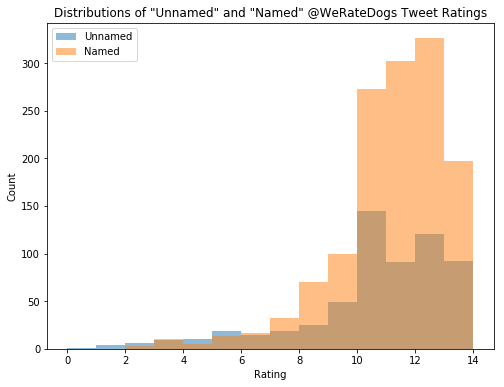

In [134]:
# Initial histogram of the number of tweets with a value of 0 to 14+.
rating_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, ]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(unnamed_df1cf['rating_numerator'], bins=rating_bins, alpha=0.5, label='Unnamed')
ax.hist(named_df1cf['rating_numerator'], bins=rating_bins, alpha=0.5, label='Named')
ax.set_title('Distributions of "Unnamed" and "Named" @WeRateDogs Tweet Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.legend(loc='upper left')
plt.show()

# NOTE:  This plot is essentially a graphic .value_counts() when the rating_bins are set at steps of 1.
# NOTE:  Plotting the proportions of the respective total number of tweets for each of the "Named"
#        and "Unnamed" groups would help "normalize" the comparison.

In [135]:
# Preparing to calculate the proportion of each rating value for tweets WITH a dog name.
named_rating_val_cts = named_df1cf.rating_numerator.value_counts()
print(named_rating_val_cts)
named_rating_val_cts.values.sum()

12    326
11    302
10    273
13    178
9     100
8      70
7      32
14     19
6      17
5      13
3      10
4       5
2       3
Name: rating_numerator, dtype: int64


1348

In [136]:
# Proportion of each rating value for tweets WITH a dog name.
named_rating_props = named_rating_val_cts / named_rating_val_cts.values.sum()
named_rating_props

12    0.241840
11    0.224036
10    0.202522
13    0.132047
9     0.074184
8     0.051929
7     0.023739
14    0.014095
6     0.012611
5     0.009644
3     0.007418
4     0.003709
2     0.002226
Name: rating_numerator, dtype: float64

In [137]:
# Sorting based on index (i.e., rating) for more intuitive view.
named_rating_props.sort_index()

2     0.002226
3     0.007418
4     0.003709
5     0.009644
6     0.012611
7     0.023739
8     0.051929
9     0.074184
10    0.202522
11    0.224036
12    0.241840
13    0.132047
14    0.014095
Name: rating_numerator, dtype: float64

In [138]:
# Preparing to calculate the proportion of each rating value for tweets WITHOUT a dog name.
unnamed_rating_val_cts = unnamed_df1cf.rating_numerator.value_counts()
print(unnamed_rating_val_cts)
unnamed_rating_val_cts.values.sum()

10    145
12    120
11     91
13     76
9      49
8      25
7      19
5      19
14     16
6      15
4      10
3       9
2       6
1       4
0       1
Name: rating_numerator, dtype: int64


605

In [139]:
# Proportion of each rating value for tweets WITHOUT a dog name.
unnamed_rating_props = unnamed_rating_val_cts / unnamed_rating_val_cts.values.sum()
unnamed_rating_props

10    0.239669
12    0.198347
11    0.150413
13    0.125620
9     0.080992
8     0.041322
7     0.031405
5     0.031405
14    0.026446
6     0.024793
4     0.016529
3     0.014876
2     0.009917
1     0.006612
0     0.001653
Name: rating_numerator, dtype: float64

In [140]:
# Sorting based on index (i.e., rating) for more intuitive view.
unnamed_rating_props.sort_index()

0     0.001653
1     0.006612
2     0.009917
3     0.014876
4     0.016529
5     0.031405
6     0.024793
7     0.031405
8     0.041322
9     0.080992
10    0.239669
11    0.150413
12    0.198347
13    0.125620
14    0.026446
Name: rating_numerator, dtype: float64

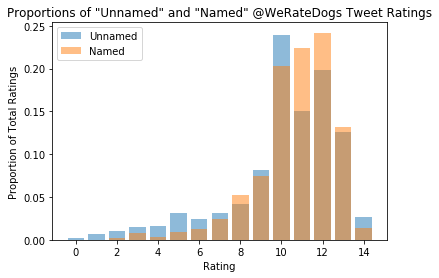

In [141]:
# Bar chart of the proportion of individual ratings among the total number of ratings for 
# "Named" and "Unnamed" tweets.
plt.bar(unnamed_rating_props.index, unnamed_rating_props, alpha=0.5, label='Unnamed')
plt.bar(named_rating_props.index, named_rating_props, alpha=0.5, label='Named')

plt.title('Proportions of "Unnamed" and "Named" @WeRateDogs Tweet Ratings')
plt.xlabel('Rating')
plt.ylabel('Proportion of Total Ratings')
plt.legend(loc='upper left')
plt.show()

#### CONCLUSION:  
- **A greater proportion of "unnamed" tweets was observed at all but one of the lower rating levels (i.e., 10 or less), although a greater proportion of "unnamed" tweets was also observed at the highest rating (i.e., 14).** 

### QUESTION 2: Do retweet_count and/or favorite_count of a tweet correlate with that tweet's dog rating?

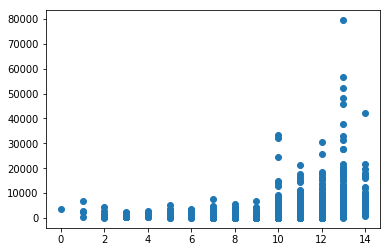

In [142]:
# Initial scatter plot of retweet counts (y) vs. rating value (x) for the cleaned and filtered 
# df1 (i.e., twitter-archive-enhanced.csv) dataset.
plt.scatter(x=df1_clean_n15d10.rating_numerator, y=df1_clean_n15d10.retweet_count);

# NOTE: The retweet counts below 5000 are "compressed" to the bottom of the plot.  Try log(y).

In [143]:
# Generate a working sub-DataFrame, replace any retweet_count == 0 with a value of 1, 
# and then calculate the logarithm base 10 of the retweet_count values (np.log10()).
df1cf_sub = df1_clean_n15d10[['tweet_id', 'rating_numerator', 'retweet_count', 'favorite_count']]
print(df1cf_sub.shape)
df1cf_sub.sample(10)

(1953, 4)


,tweet_id,rating_numerator,retweet_count,favorite_count
1356,680609293079592961,9,816,2906
1695,670995969505435648,12,317,1175
608,767191397493538821,13,4406,13643
40,883360690899218434,13,3825,22986
1135,695629776980148225,8,2377,5020
1162,693095443459342336,10,523,2056
1706,670807719151067136,11,546,1234
1400,678767140346941444,8,1553,3864
105,867421006826221569,12,2697,16755
109,866334964761202691,12,15546,54720


In [144]:
# Check for any retweet_count values of 0 (.replace() 0 with 1 to allow application of np.log10())
print(df1cf_sub.query('retweet_count == 0').shape)
df1cf_sub.query('retweet_count == 0')

# NOTE: No retweet_count values of 0.

(0, 4)


,tweet_id,rating_numerator,retweet_count,favorite_count


In [145]:
# Check for any favorite_count values of 0 (.replace() 0 with 1 to allow application of np.log10())
print(df1cf_sub.query('favorite_count == 0').shape)
df1cf_sub.query('favorite_count == 0')

# NOTE: No favorite_count values of 0.

(0, 4)


,tweet_id,rating_numerator,retweet_count,favorite_count


In [146]:
# Generate columns for the log of the retweet counts and favorite counts.
# NOTE: np.log is base e; np.log2 is base 2; np.log10 is base 10
df1cf_sub['retweet_ct_log10'] = df1cf_sub.retweet_count.apply(np.log10)
df1cf_sub['favorite_ct_log10'] = df1cf_sub.favorite_count.apply(np.log10)
df1cf_sub.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,tweet_id,rating_numerator,retweet_count,favorite_count,retweet_ct_log10,favorite_ct_log10
0,892420643555336193,13,8853,39467,3.947090,4.596234
1,892177421306343426,13,6514,33819,3.813848,4.529161
2,891815181378084864,12,4328,25461,3.636287,4.405875
3,891689557279858688,13,8964,42908,3.952502,4.632538
4,891327558926688256,12,9774,41048,3.990072,4.613292


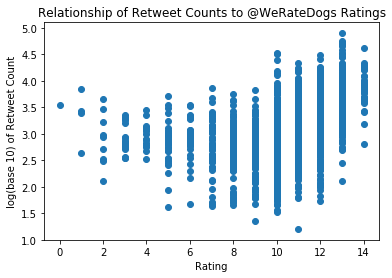

In [147]:
# Scatter plot of log10 of retweet counts (y) vs. rating value (x) for the cleaned and filtered df1 data.
plt.scatter(x=df1cf_sub.rating_numerator, y=df1cf_sub.retweet_ct_log10)

plt.title('Relationship of Retweet Counts to @WeRateDogs Ratings')
plt.xlabel('Rating')
plt.ylabel('log(base 10) of Retweet Count')
plt.show()

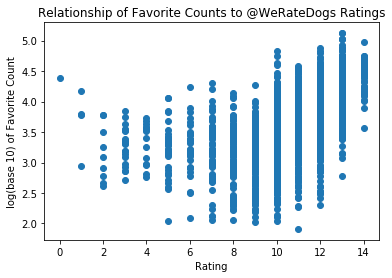

In [148]:
# Scatter plot of log10 of favorite counts (y) vs. rating value (x) for the cleaned and filtered df1 data.
plt.scatter(x=df1cf_sub.rating_numerator, y=df1cf_sub.favorite_ct_log10)

plt.title('Relationship of Favorite Counts to @WeRateDogs Ratings')
plt.xlabel('Rating')
plt.ylabel('log(base 10) of Favorite Count')
plt.show()

#### CONCLUSION:
- **It appears that both retweet counts and favorite counts show a similar relationship to the corresponding rating values, and this relationship appears to have a non-linear "concave" shape.**

### QUESTION 3: Among the 10 most common, high probability dog breed predictions, do any of the dog breeds tend to be rated higher?

In [149]:
# Generate a working DataFrame selecting "high prediction breed" rows from df1_clean_plus (i.e., twitter_archive_master.csv)
# with a prediction rank == 1, a prediction confidence > 0.5, AND a prediction of a valid dog breed.
high_pred_breeds = df1_clean_n15d10.query('p1_conf > 0.5 & p1_dog == True')
print(high_pred_breeds.shape)
high_pred_breeds

(920, 22)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,7624,31166
12,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,8538,38818
13,889638837579907072,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,...,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,4735,27672
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,2321,15359
15,889278841981685760,2017-07-24 00:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,https://pbs.twimg.com/ext_tw_video_thumb/88927...,...,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True,5637,25652
16,888917238123831296,2017-07-23 00:22:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,...,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,4709,29611


In [150]:
# NOTE:  WORKING WITH TWO DATAFRAMES via tweet_id's.

# Generate a working DataFrame selecting "high prediction breed" rows from df2_clean_ps (i.e., breed_predictions.csv)
# with a prediction rank == 1, a prediction confidence > 0.5, AND a prediction of a valid dog breed.
# high_pred_breeds = df2_clean_ps.query('pred_rank == 1 & pred_conf > 0.5 & dog_pred == True')
# print(high_pred_breeds.shape)
# high_pred_breeds

In [151]:
# Value counts for the common, high probability dog breeds.
high_pred_breeds_vcts = high_pred_breeds.p1.value_counts()
high_pred_breeds_vcts

golden_retriever                  115
Pembroke                           70
Labrador_retriever                 62
Chihuahua                          46
pug                                43
Samoyed                            30
Pomeranian                         29
chow                               26
toy_poodle                         23
French_bulldog                     22
German_shepherd                    19
malamute                           18
cocker_spaniel                     14
Maltese_dog                        14
Shetland_sheepdog                  12
Cardigan                           12
Shih-Tzu                           11
Chesapeake_Bay_retriever           11
miniature_pinscher                 11
vizsla                             10
West_Highland_white_terrier        10
Staffordshire_bullterrier          10
Bernese_mountain_dog               10
American_Staffordshire_terrier      9
Pekinese                            9
Eskimo_dog                          9
Rottweiler  

In [152]:
# Value counts for the common, high probability dog breeds.
# high_pred_breeds_vcts = high_pred_breeds.prediction.value_counts()
# high_pred_breeds_vcts

In [153]:
# Generate a list of the 10 most common, high probability dog breeds.
high_pred_breeds_list = high_pred_breeds_vcts.index[0:10]
high_pred_breeds_list

Index(['golden_retriever', 'Pembroke', 'Labrador_retriever', 'Chihuahua',
       'pug', 'Samoyed', 'Pomeranian', 'chow', 'toy_poodle', 'French_bulldog'],
      dtype='object')

In [154]:
# Limit high_pred_breeds DataFrame to rows associated with the 10 most common, high probability dog breeds.
high_pred_breeds1_10 = high_pred_breeds.query('p1 in @high_pred_breeds_list')
high_pred_breeds1_10.shape    # Should be (469, 22) according to sum of top 10 dog breed value counts.

(466, 22)

In [155]:
# Group rows of the working DataFrame by predicted dog breed ('p1' column) and use .describe()
# to assess the dog rating mean and spread for each of the 10 most common, high probability dog breeds. 
high_pred_breeds1_10.groupby('p1').rating_numerator.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
pug,43.0,10.209302,1.819970,3.0,9.50,10.0,11.0,13.0
Chihuahua,46.0,10.565217,1.939670,5.0,10.00,11.0,12.0,14.0
toy_poodle,23.0,11.130435,1.099766,9.0,10.50,11.0,12.0,13.0
Pomeranian,29.0,11.172414,1.002460,10.0,10.00,11.0,12.0,14.0
Labrador_retriever,62.0,11.193548,1.340892,8.0,10.00,11.0,12.0,13.0
French_bulldog,22.0,11.227273,1.770978,8.0,10.25,11.5,12.0,14.0
Pembroke,70.0,11.657143,1.540616,4.0,11.00,12.0,13.0,14.0
golden_retriever,115.0,11.686957,1.209358,8.0,11.00,12.0,12.0,14.0
chow,26.0,11.730769,0.961569,10.0,11.00,12.0,12.0,13.0


In [156]:
# Get tweet_id's from high_pred_breeds1_10 to check the number of corresponding rows in df1_clean_n15d10 in next Code Cell.
# high_pred_breeds1_10_twids = high_pred_breeds1_10.tweet_id.values
# print(len(high_pred_breeds1_10_twids))    # Should be 494.

In [157]:
# Identify the number of rows of df1_clean_n15d10 that correspond to the high_pred_breeds1_10 tweet_id's.
# df1cf_top10_breeds = df1_clean_n15d10.query('tweet_id in @high_pred_breeds1_10_twids')
# print(df1cf_top10_breeds.shape)    # REM: Any "reply" or "retweet" rows and filtered-out rows associated with the top 10 breed
                                   # twids will have been dropped from df1_clean_n15d10, therefore shape may be < 494 rows.

In [158]:
# Inner (or Left, in this case) merge df1_clean_n15d10 with high_pred_breeds1_10 based on tweet_id
# to limit to the 466 "intersecting" rows.
# df1cf_top10_breeds = df1_clean_n15d10.merge(high_pred_breeds1_10, how='inner', on='tweet_id')
# print(df1cf_top10_breeds.shape)    # Should be (466, 16).
# df1cf_top10_breeds.head()

In [159]:
# Group rows of the working DataFrame by predicted dog breed ('p1' column) and use .describe()
# to assess the dog rating mean and spread for each of the 10 most common, high probability dog breeds. 
# df1cf_top10_breeds.groupby('prediction').rating_numerator.describe().sort_values('mean')

#### CONCLUSION:
- **While there is notable overlap in rating values among all 10 of the analyzed dog breeds, the pug breed mean rating and five-number rating distribution summary (min, quartiles, and max) are suggestive of a full point lower rating overall for pugs compared to the consistently highly rated chow and Samoyed breeds.**